# Begin

In [9]:
import tensorflow as tf
import numpy as np ## math computations
import matplotlib.pyplot as plt ## plottting bar chart
import tensorflow_datasets as tfds ## Load dataset từ tensor: https://www.tensorflow.org/datasets/api_docs/python/tfds/load
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model

In [10]:
# Kiểm tra các thiết bị khả dụng
devices = tf.config.list_physical_devices()
print("Các thiết bị khả dụng:", devices)

# Kiểm tra xem GPU có sẵn không
if tf.test.gpu_device_name():
    print('GPU đang được sử dụng')
else:
    print('CPU đang được sử dụng')


Các thiết bị khả dụng: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU đang được sử dụng


2024-04-30 01:25:57.371307: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:25:57.371412: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:25:57.371449: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:25:57.371673: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:25:57.371684: I tensorflow/core/common_runtime/gpu/gpu

In [11]:
# Thiết lập cấu hình cho GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Chỉ định bộ nhớ GPU được sử dụng bởi TensorFlow
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3584)])
    except RuntimeError as e:
        print(e)


In [12]:
model = load_model('model_metrics.keras')

2024-04-30 01:26:19.555250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:26:19.555453: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:26:19.555525: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:26:19.555638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 01:26:19.555656: I tensorflow/core/common_runtime/gpu/gpu

# Những gì sẽ học

Building Convolutional Neural Networks with TensorFlow [Malaria Diagnosis]

⌨️ (6:28:50) Task Understanding

⌨️ (6:37:40) Data Preparation

⌨️ (6:57:40) Data Visualization

⌨️ (7:00:20) Data Processing

⌨️ (7:08:50) How and Why ConvNets Work

⌨️ (7:56:15) Building Convnets with TensorFlow

⌨️ (8:02:39) Binary Crossentropy Loss

⌨️ (8:10:15) Training Convnets

⌨️ (8:23:33) Model Evaluation and Testing

⌨️ (8:29:15) Loading and Saving Models to Google Drive

Building More Advanced Models in Teno Convolutional Neural Networks with TensorFlow [Malaria Diagnosis]

⌨️ (8:47:10) Functional API

⌨️ (9:03:48) Model Subclassing

⌨️ (9:19:05) Custom Layers

Evaluating Classification Models [Malaria Diagnosis]

⌨️ (9:36:45) Precision, Recall and Accuracy

⌨️ (10:00:35) Confusion Matrix

⌨️ (10:10:10) ROC Plots

# Task Understanding

Theo WHO, số lượng chết vì bị sốt rét (Malaria deaths) năm 2019 là 409,000. Trong phần này chúng ta sẽ build 1 machine learning model để dự đoán bệnh sốt rét dựa trên convolutional neural network

Bênh nhân sẽ phải cung cấp hình ảnh thông tin tế bào dưới kính hiển vi, từ đó model sẽ phân loại segmented blood cell (phân đoạn tế bào máu) là parasitized or unparsitized (ký sinh hoặc không ký sinh). Có 2 loại là máu mỏng và dày. Nó sẽ được đặt dưới kính hiển vi => Chụp ảnh thu được dataset

Kiến thức thực tế: Khi bị cắn bởi muỗi, những vết cắn này có khả năng truyền ký sinh trùng Plasmodium pacifarum vào máu. Do đó để chuẩn đoán người bị mắc bệnh sốt rét, cần lấy máu của họ (thường lấy máu ở ngón giữa)

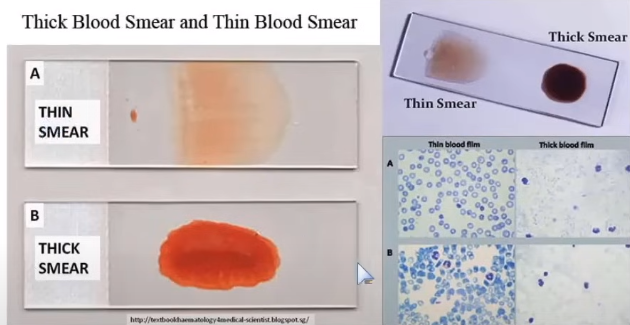

1 image được dại diện bởi 3 thông số H (height), W (width), C (color channel). Đây cũng chính là shape khi lưu image vào tensor

Với ảnh ở hệ màu grayscale, nó chỉ có 1 color channel (tensor 2 chiều), với các ảnh ở các hệ màu khác như bgr, rgb nó có 3 color channel (tensor 3 chiều)

Chuyển image từ hệ màu BGR sang Grayscale: x = r * 0.299 + g * 0.587 + b * 0.114.

Bài toán của chúng ta thuộc dạng binary classìication và làm việc với giữ liệu dạng ảnh. Cần phải hiểu cách ảnh hoạt động

Ảnh được tạo bởi các pixel. Dataset của bài này là các ảnh có kích thước 86x82 pixel. Mỗi pixel có giá trị từ 0 đến 255, và có 3 kênh màu là red-green-blue. Các tham số trong hình dưới dây là đã được chuẩn hóa (chia 255)

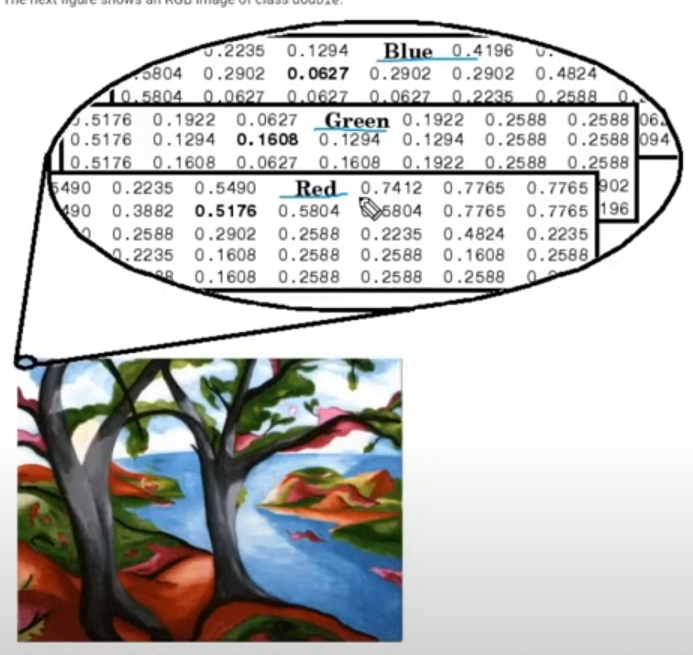

1 image được dại diện bởi 3 thông số H (height), W (width), C (color channel). Đây cũng chính là shape khi lưu image vào tensor

Với ảnh ở hệ màu grayscale, nó chỉ có 1 color channel (tensor 2 chiều), với các ảnh ở các hệ màu khác như bgr, rgb nó có 3 color channel (tensor 3 chiều)

Chuyển image từ hệ màu BGR sang Grayscale: x = r * 0.299 + g * 0.587 + b * 0.114.

Các giá trị ảnh đặc biệt:
- 0: black
- 255: white
Khi sử dụng threshold (ngưỡng) thì các giá trị này sẽ được đưa về 0 và 1

# Data Preparation

## Nguồn data

Nguồn dataset: https://www.tensorflow.org/datasets/catalog/malaria

Tổng quan về dataset: Bộ dữ liệu Sốt rét chứa tổng cộng 27.558 hình ảnh tế bào với các trường hợp bằng nhau (tức là 50% cái này, 50% cái kia, dataset ngon) của các tế bào bị ký sinh (parasitized) và không bị nhiễm bệnh (uninfected) từ các hình ảnh phết máu mỏng (thin blood smear slide) của các tế bào được phân đoạn.

Click Explore in know your data để hiểu thêm về dataset (6:38:34)

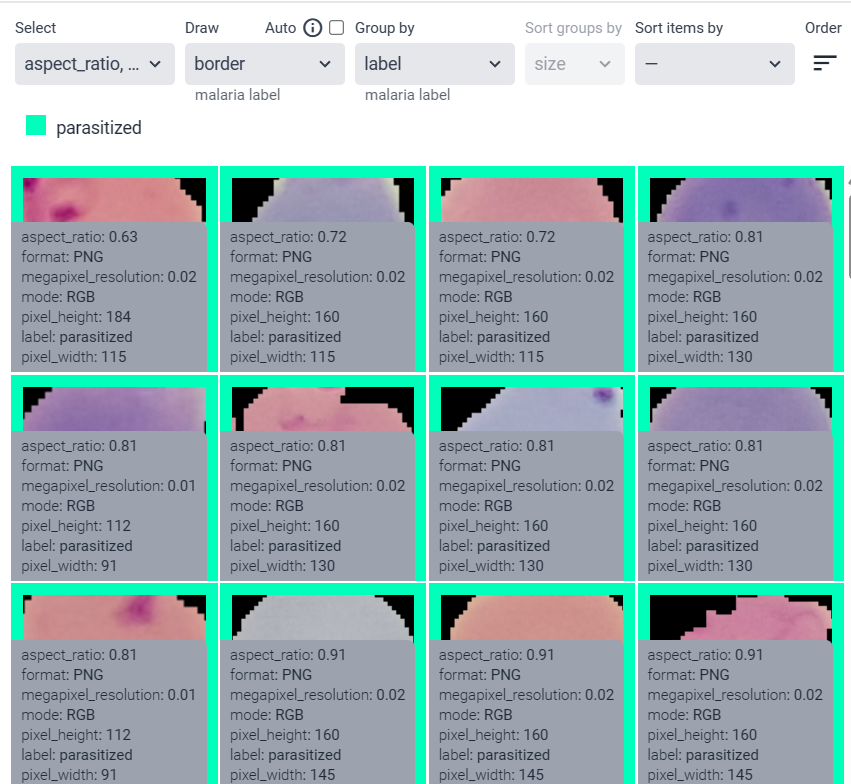

Chọn select và hiển thị các trường cần biết và Draw chọn label, từ trên ta có thể thấy: các image trong dataset có format png, kích thước khác nhau (cần resize lại)

## Load dataset

In [13]:
import tensorflow as tf
import numpy as np ## math computations
import matplotlib.pyplot as plt ## plottting bar chart
import tensorflow_datasets as tfds ## Load dataset từ tensor: https://www.tensorflow.org/datasets/api_docs/python/tfds/load

In [14]:
# Đọc các giá trị mặc định ở modul tfds.load sẽ thấy with_info = false nên ta không thể lấy dataset_info
# as_supervised=True: chỉ định rằng bạn muốn tải dữ liệu dưới dạng cặp (dữ liệu, nhãn), trong đó nhãn là thông tin về lớp của mỗi mẫu.
# shuffle_files=True: Trộn dataset theo 1 thứ tự bất kỳ để tránh sai sót dựa trên cách thu thập dữ liệu
# split=['train']: chỉ định rằng bạn chỉ muốn tải phần dữ liệu huấn luyện của bộ dữ liệu.
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

## Chia dataset thành các tập train, val, test

In [15]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [16]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

In [17]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  # Lấy các phần tử dầu tiên
  train = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  # skip các phần tử đã dùng làm train set
  val_test = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val = val_test.take(int(VAL_RATIO*DATASET_SIZE))

  test = val_test.skip(int(VAL_RATIO*DATASET_SIZE))
  return train, val, test

In [19]:
train, val, test = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]


2024-04-30 01:26:48.495417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Dataset Visualization

2024-04-30 01:26:50.445280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


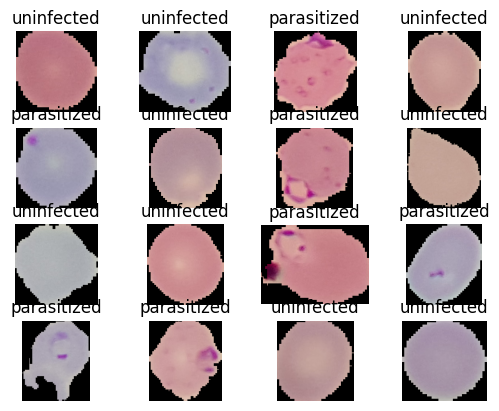

In [20]:
for index, (image, label) in enumerate(train.take(16)):
  ax = plt.subplot(4, 4, index + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

# Data Processing

## Resize image

Các image trong dataset có kích thước khác nhau, cần phải resize tất cả các image về cùng 1 size cho dễ xử lý

## Normalization (chuẩn hóa-train model nhanh và hiệu suất tốt hơn)

Chuẩn hóa data theo phân phối chuẩn (standardization) hoặc min-max (Scaling) như bài trước đã nói
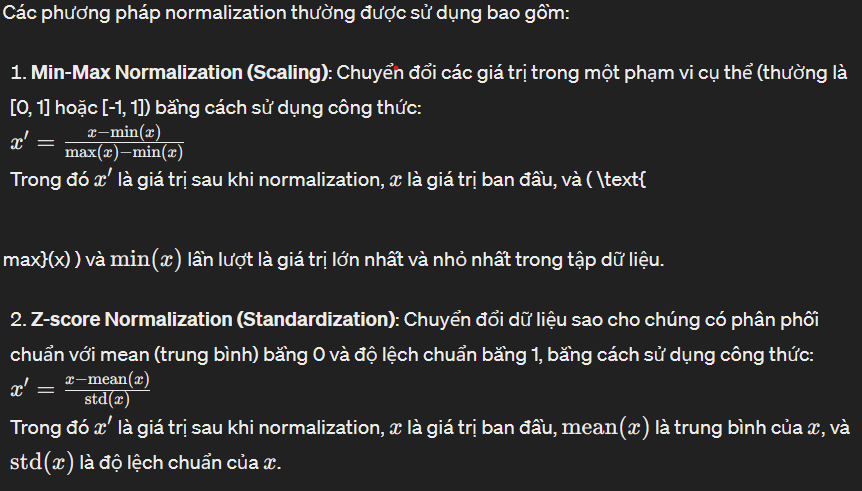

Việc chọn giữa standardize và normalize phụ thuộc vào loại data bạn đang làm việc.
- Nếu dữ liệu phân tán xung quanh 1 giá trị xác định thì dùng phân phối chuẩn
- Nếu dữ liệu luôn nắm trong phạm vị nào đó nhất định (kiểu từ 0 - 255), so với phân phổi chuẩn luôn có những ngoại lệ (luôn tồn tại những ra giá trị nằm cách xa mean) thì dùng min-max scale

## Quay lại bài toán

In [21]:
# tf.image.resize: https://www.tensorflow.org/api_docs/python/tf/image/resize
IM_HEIGHT = 224
IM_WIDTH = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_HEIGHT, IM_WIDTH))/255.0, label

In [22]:
train = train.map(resize_rescale)
val = val.map(resize_rescale)
test = test.map(resize_rescale)

In [23]:
for image, label in train.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


2024-04-30 01:26:59.329530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
# Shuffer training set
BATCH_SIZE = 32
train = train.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val = val.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [25]:
val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [26]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# How and why convolution network work

## Với mạng neutron truyền thống:

- Giả sử có n input signal đi vào neutron. Việc train model là phải xác định toàn bộ trọng số w0->wn trong mạng neutron
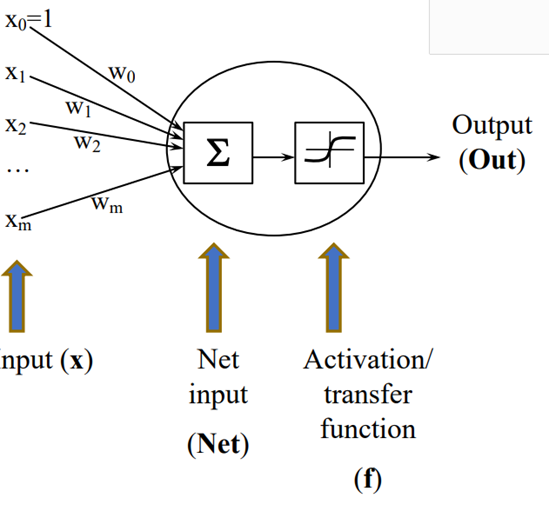

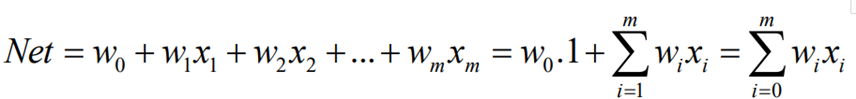
- Với cách này, mỗi input signal và bias sẽ có 1 trọng số w cần phải train và ouput sau khi đưa net và activation function sẽ là 1 số
- Nhược điểm cách này trong xử lý ảnh: giả sử ảnh màu có kích thước 64 * 64 => Nó được biểu diễn dưới dạng tensor 64 * 64 * 3. Giả sử hidden layer 1 có m neutron và ta sử dụng mạng thuộc dạng fully connected => Có (64 * 64 *3+1) parameter phải xác định cho mỗi neutron => (64 * 64 * 3+1)*m parameter cần phải xác định cho toàn bộ netron trong hidden 1. Số parameter sẽ còn tăng khi kích thước ảnh, số lượng hidden layer và neutron trong nó tăng lên. Máy tính không thể nào train được và dù train được cũng rất lâu, hàm f sinh ra sẽ cực kỳ phức tạp và gây trễ cao trong xử lý live video

## Với convolution neutural network: được sinh ra để giải quyết bài toán trên bằng cách thay đổi số lượng trọng số w sao cho phù hợp

- Tiền đề phải hiểu về 3 phép tính convolution/pading/strike: Chi tiét đọc tại https://nttuan8.com/bai-5-gioi-thieu-ve-xu-ly-anh/
- Ý tưởng: Thay đổi cấu trúc hàm Net ở trên.
  - Ma trận X trong phép tính convolution chính là đại diện cho input signal cần ném vào 1 neutron (đây là con số cố định không thể thay đổi và là dataset).
  - Ma trận W hay còn gọi là filter/kernel/windown chính là 1 ma trận chứa các trọng số mà model cần train, tức việc train model là để ta học được ma trận kernel nó như thế nào chứ không phải ta cho trước ma trận kernel trước khi train. W luôn có size k*k trong dó k phải lẻ. Giả sử W có size 3*3, ta có thể thấy giờ đây môi input signal x(n) thay vì sử dụng tham số w(n) bất kỳ của riêng mk để tính x(n)*w(n) ném vào hàm Net thì nó sẽ sử dụng 9 tham số trong ma trận W để có dược kết quả ném vào hàm Net và đặc biệt 9 tham số này áp dụng cho tất cả các input signal/pixel => Số tham số cần train giảm mạnh xuống còn 9 thay vì rất nhiều như trên
  - Ma trận Y: chính là ouput của neutron sau khi đi qua activation function. Có thể thấy output giờ chính là 1 tensor chứ không phải là 1 số như trước kia nữa
- Ảnh BGR có 3 chiều chứ không phải 2 chiều như ảnh grayscale. Lúc này thay vì dùng mỗi filter k*k sẽ dùng filter có dạng k*k*3 (cùng shape với input signal), Ngoài ra khi thực hiện phép covolution lên input signal và ma trận filter, ta còn phải cộng thêm bias nữa

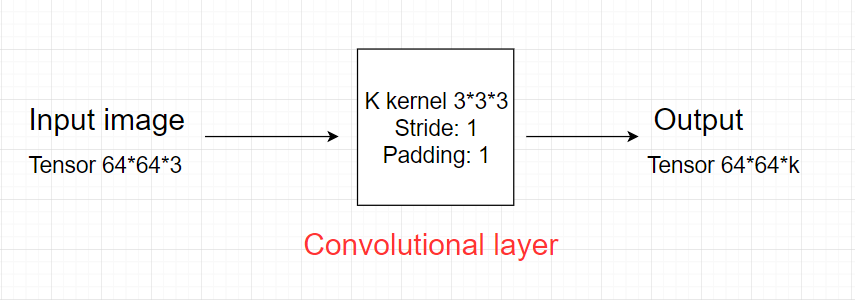


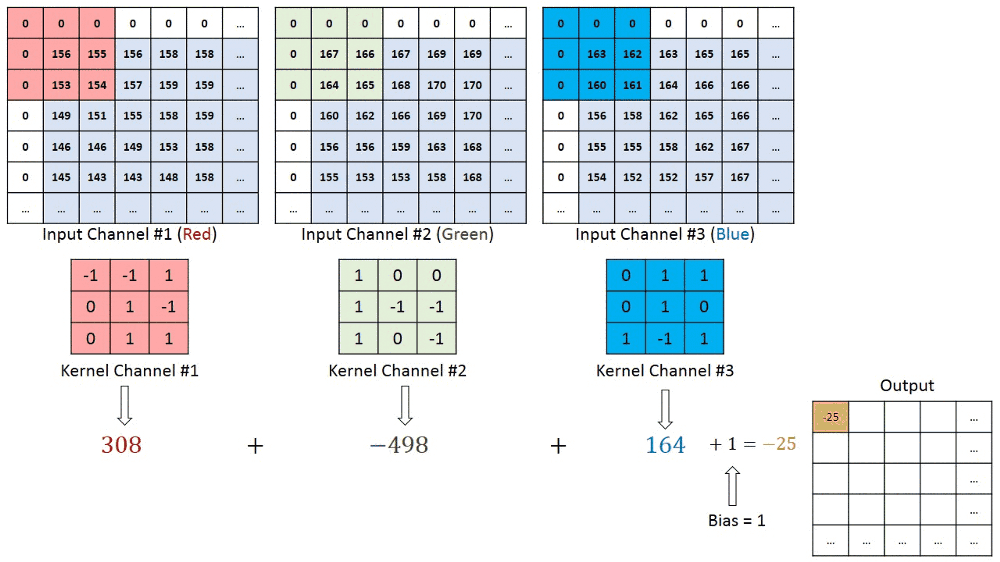

- Nếu chỉ thực hiện mỗi phép covolution không thì ma trận output Y sẽ luôn có chiều bé hơn so với ma trận input X => Cần áp dụng phép tính pading để tăng kích thước sao cho phù hợp

Chi tiết về cách hoạt động của kernel trên ảnh: https://setosa.io/ev/image-kernels/

Mỗi 1 pixel trong input image sẽ được chọn làm tâm của kernel, do đó các kernel áp dụng với pixel ở biên sẽ cho ra kết quả unknown (di chuột để biết)

Tổng quát hóa lại cách CNN hoạt động với convolution layer và polling layer (dùng để subsamping)

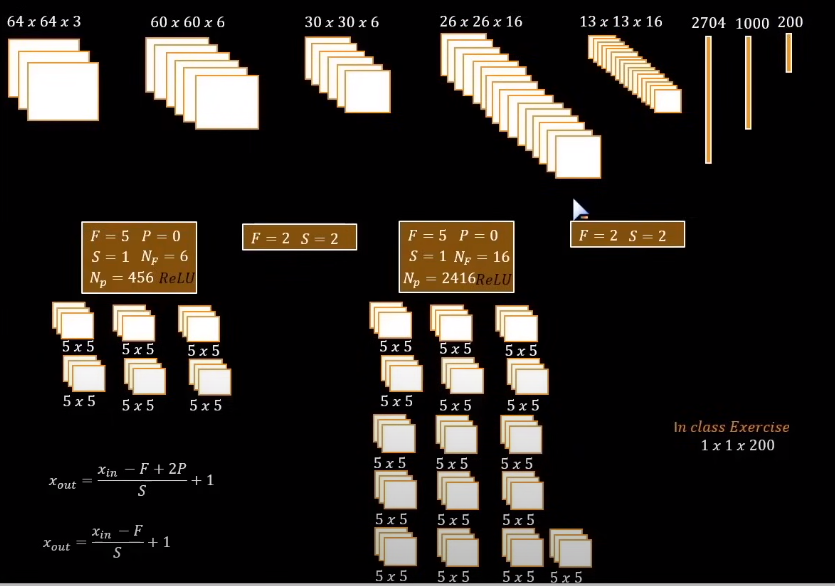

Đầu tiên ảnh (64*64*3) đi qua convolution layer 1:
- convolution layer này có 6 filter, mỗi filter có kích thước 5*5*3 => F = 5, tổng số parameter cần train là 6 * (5 * 5 * 3 + 1) = Np = 456
- Sau khi thực hiện phép nhân convoulution layer, ta đưa vó vào activation function Relu
- output của mỗi filter là 1 ma trận 2 chiều (luôn là thế) có kích thước áp dụng theo công thức đã nói ở trên
- có 6 filter nên output của convolution layer này là 6 ma trận 60*60

Outout của convolution 1 đi vào Polling layer 1 có size = (2 * 2), padding =0, strike = 2 => F=S=2, P=0, áp dụng công thức ta tính được kích thước output của Poliiing layer này là 30 * 30 * 6

Output của Polling layer 1 tiếp tục đi vào Convolution layer 2 có 16 filter và đi ra tiếp polling layer 2 như trên hình

Ouput của pulling layer 2 là tensor shape = (13 * 13 * 16). Tiến hành làm phẳng nó về thành mảng có 13*13*16=2704 phần tử

Output trên sẽ đi qua các dense layer (fully contected layer) để có được kết quả cuối cùng


## Sử dụng Tensor flow để train model

Sử dụng module tf.keras.layers.Conv2D để tạo Convolution layer
- Ví dụ muốn tạo Convolution layer với kernel chiều, sử dụng tf.keras.layers.Conv2D: Đọc doc để hiểu rõ hơn về các tham số mặc định: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- Conv1D: Convolution Layer được thiết kế để xử lý các dữ liệu dạng 1 chuỗi 1 chiều như âm thanh, văn bản, NLP, xử lý tín hiệu âm thanh
- Conv2D: Lớp này được sử dụng cho việc xử lý dữ liệu hai chiều như ảnh hoặc dữ liệu 2D (nó dựa vào dữ liệu loại gì không phải là số chiều ảnh)
- Conv3D: Lớp này được sử dụng cho việc xử lý dữ liệu ba chiều, chẳng hạn như dữ liệu video, dữ liệu y tế 3D (MRI, CT scans)

Các tham số quan trọng trong doc với Conv2D:
  - filters: số lượng filter của layer
  - kernel_size: kích thước của mỗi filter trong layer
  - strides: là 1 tupple (H,W). Ví dụ strides = (1,2) sẽ dịch theo chiều nganh 1 step và dịch theo chiều dọc là 2
  - data_format: có 2 loại format là H,W,C (channel_last) và C,H,W (channel_first) đối với tham số này. Thực ra khi nhập còn phải thêm batch_size ở đầu nữa (đọc doc)
  - dilation_rate (tốc độ giãn nở):
    - Ví dụ với dialation_rate = 2, https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/dilation.gif (hình ở dưới là input image và kernel trên là output image)
    - dilation_rate = 1 (mặc định): kernel sẽ dược trượt trên image như bình thường để tính tích chập giữa các image
    - dilation_rate = 2: kernel sẽ trượt qua input với bước lớn hơn, tạo ra một khoảng cách giữa các vị trí liên tiếp của kernel. Điều này có tác dụng mở rộng kích thước của receptive field mà kernel có thể "nhìn thấy", giúp mạng có khả năng học được các đặc trưng lớn hơn hoặc trích xuất thông tin từ xa hơn trong dữ liệu đầu vào.
    - Tóm lại, dilation_rate được sử dụng để điều chỉnh kích thước và tốc độ mở rộng của kernel trong quá trình tích chập, giúp mạng có khả năng trích xuất các đặc trưng lớn hơn hoặc từ xa hơn trong dữ liệu.
  - groups: là 1 số nguyên dương chỉ định số lượng group trong trường hợp input được split theo channel axis (cái trực color space). Ví dụ output của Polling layer 2 là 1 tensor 30*30*6 => Chia nó làm 3 group có kich thước 30*30*2. Và mỗi group này sẽ đi vào 1 số filter nhất định của Convolution Layer chứ không phải đi vào tất cả
  - activations:
  - use_bias: mặc định là True => Không quan tâm
  - Các tham số tiếp theo liên quand dến việc khởi tạo giá trị cho kernel và bias, .... => Không quan tâm

Sử dụng module tf.keras.MaxPool2D/1D/3D để tạo Pooling layer
- Dùng tương ứng với Conv1D/2D/3D
- Các tham số như trên, đọc doc: https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

Sử dụng module tf.keras.layers.Flatten để làm phẳng ma trận
- tf.keras.layers.Flatten: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

## Quay lại bài toán: Building CNN with Tensorflow

### Sử dụng Sequential API

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization

In [ ]:
# Xây dựng kiến trúc mạng CNN để train
model = tf.keras.Sequential([
    InputLayer(shape = (IM_HEIGHT, IM_WIDTH, 3)),

    # Các Convolution layer và Pooling layer phục trách extract (trích xuất) các feature hữu ích trong ảnh. Gọi là feature extractor
    Conv2D(
        filters = 6,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu'
    ),
    # Tiến hành BatchNormalization: Các image trong cùng 1 batch tiến hành standard normalization
    # Là 1 kỹ thuật quan trọng trong deeplearning được sử dụng để ổn định và tăng tốc độ train mạng neutron
    # Được áp dụng trước hoặc sau các lớp activation của mạng neutron
      # 1. Ổn định quá trình huấn luyện: : BatchNormalization giúp làm giảm sự phụ thuộc vào việc khởi tạo tham số của mạng và giúp giảm hiện tượng biến mất hoặc đột biến gradient trong quá trình lan truyền ngược (backpropagation). Điều này giúp tăng tốc quá trình huấn luyện và cải thiện khả năng học của mạng.
      # 2. Giảm overfitting: BatchNormalization cũng có thể giúp giảm overfitting bằng cách cải thiện tính tổng quát hóa của mô hình. Nó hoạt động như một loại regularization bằng cách kiểm soát phạm vi giá trị của các feature maps trong quá trình huấn luyện.
      # 3. Tăng tốc độ hội tụ: BatchNormalization có thể giúp tăng tốc độ hội tụ của mô hình bằng cách giảm thiểu sự biến đổi của tham số trong quá trình huấn luyện, giúp mạng đạt được giá trị tối ưu nhanh hơn.
    BatchNormalization(),

    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),

    Conv2D(
        filters = 16,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu'
    ),
    BatchNormalization(),

    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),

    Flatten(),

    # Fully connected layer: chịu trách nhiệm phân loại ảnh
    Dense(100, activation = "relu"),
    BatchNormalization(),

    Dense(10, activation = "relu"),
    BatchNormalization(),

    Dense(1, activation = "sigmoid"),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

### Sử dụng Functional API

#### Tại sao cần Function API

Sequential API chỉ hỗ trợ build các layer 1 cách tuần tự

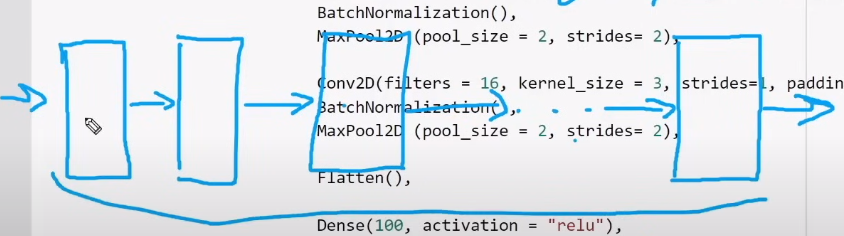

Vậy nếu bạn cần build model có 2 input và 3 output đầu ra thì sao. Ví dụ trong bài này, Ngoài việc xác định parasitized or unparsitized cần có thêm 1 output chỉ rõ bị trí nào trong ảnh có ký sinh trùng => Có những 2 output

Project đếm số mặt cười, trong 1 image có 2 mặt cười thì sao => Tách ảnh ra làm 2 cái mặt và truyền vaod model để có 1 input hoặc truyền cả cái ảnh vào input luôn

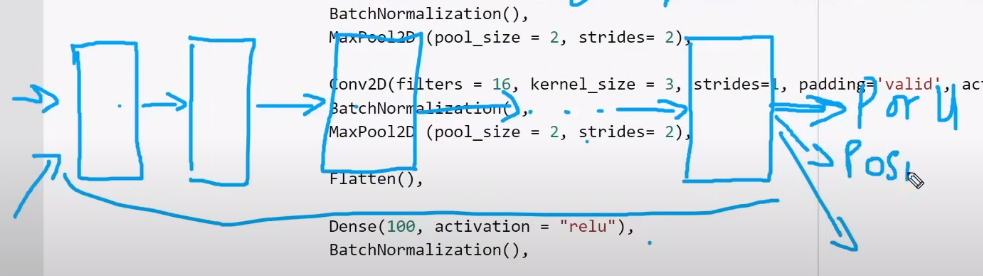
Model kiểu này xuất hiện rất nhiều trong deeplearning, đó là lý do tại sao cần Functional API. Ngoài ra, Function API còn có thể tạo model linh hoạt hơn
- ResNet: Đầu ra của 1 layer nối với (concanated) đầu ra của 1 layer trước đó
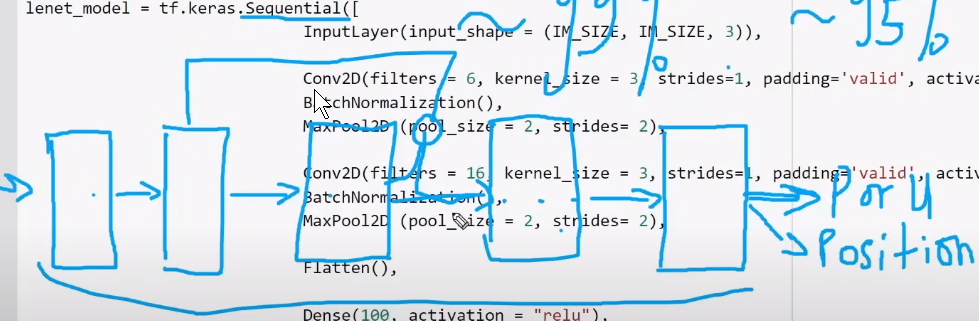

- shared layer: layer này có vai trò như 1 encorder, nó sẽ định nghĩa cách mã hóa sao cho ouput khi input là I1, I2, I3 là khác nhau. Bạn có thể tái sử dụng layer này trong nhiêu phần của mạng neutronđuềy bày giúp giảm trọng số cần train

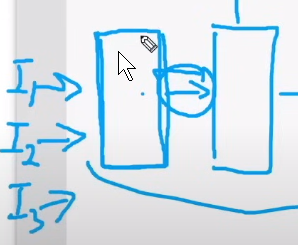

Với Functional API, bạn có thể
- Xây dựng các mô hình với nhiều đầu vào và đầu ra, trong khi Sequential API chỉ hỗ trợ các mô hình có một đầu vào và một đầu ra.

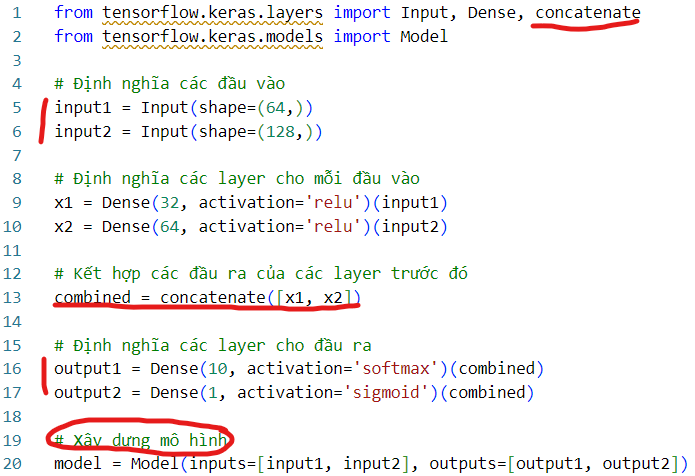

- Xây dựng mô hình phức tạp hơn như đệ quy, các nhánh song song, các khối tái sử dụng, ....

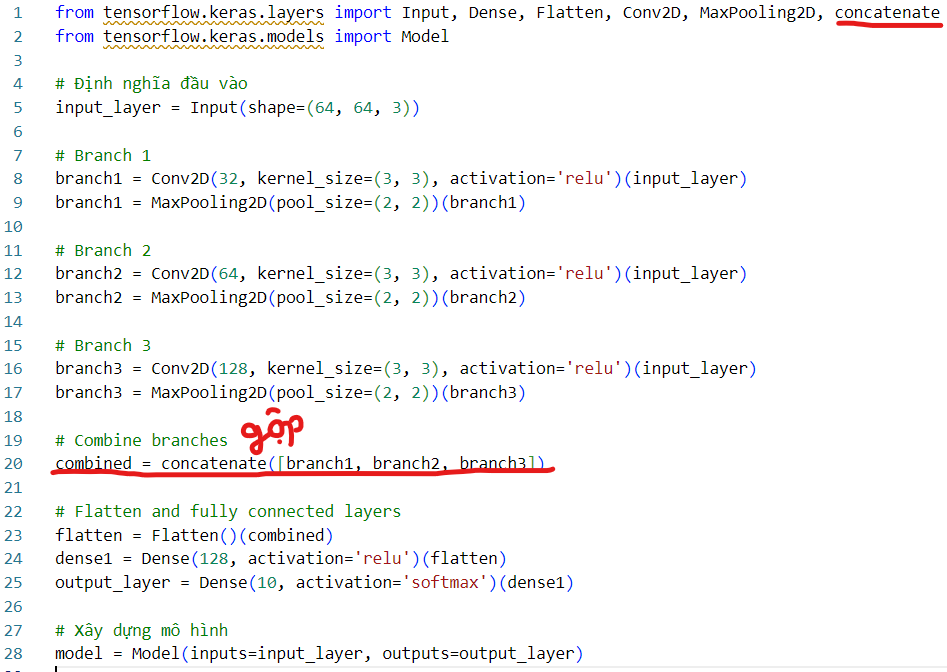

- Tái sử dụng được Layer: Với Sequential API, bạn phải tạo mới 1 Layer mỗi khi sử dụng chúng

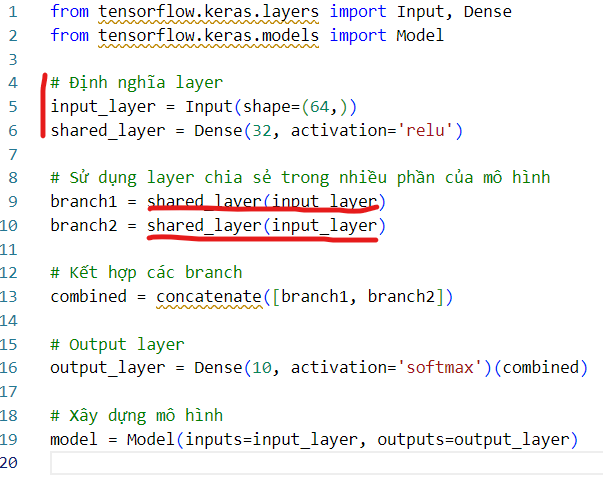

- Điều khiển kết nối: cho phép bạn kiểm soát rõ ràng các kết nối giữa các layer bằng cách truyền đầu ra của một layer vào đầu vào của một layer khác. Điều này mang lại linh hoạt cao hơn trong việc xây dựng mạng neural network.
- Tùy chỉnh các luồng dữ liệu: bạn có thể tạo các mô hình với các luồng dữ liệu phức tạp hơn, chẳng hạn như mô hình có đầu vào chia sẻ hoặc mô hình có các kết nối dữ liệu không theo trình tự.

#### Tạo model bằng functional api

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [ ]:
# Xây dựng lại kiến trúc mạng CNN Sequential dưới dạng FunctionAPI
func_input = Input(shape=(IM_HEIGHT, IM_WIDTH, 3), name="Input Image")

# Các Convolution layer và Pooling layer phục trách extract (trích xuất) các feature hữu ích trong ảnh. GỌi gọi là feature extractor
x = Conv2D(
        filters = 6,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu'
    )(func_input)
x = BatchNormalization()(x)

x = MaxPool2D(
        pool_size = 2,
        strides = 2
    )(x)

x = Conv2D(
        filters = 16,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu'
    )(x)
x = BatchNormalization()(x)

output = MaxPool2D(
        pool_size = 2,
        strides = 2
    )(x)

feature_extractor_model = Model(func_input, output, name="Feature_Extractor")
feature_extractor_model.summary()

Model: "Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input Image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 44 (176.00 B)

In [ ]:
func_input = Input(shape=(IM_HEIGHT, IM_WIDTH, 3), name = "Input image")
x = feature_extractor_model(func_input)

x = Flatten()(x)

x = Dense(100, activation="relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation="relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation="sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name="Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Feature_Extractor (Functional)  │ (None, 54, 54, 16)     │         1,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

### Model Subclassing

Có thể tự do tạo cấu trúc model theo ý mình muốn bằng cách tận dụng seqential và function API

Model Subclassing có thể build được ANN đệ quy

In [ ]:
from tensorflow.keras import Layer

In [ ]:
class FeatureExtraction(Layer):
    def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
        super(FeatureExtraction, self).__init__()
        
        self.conv_1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
        self.batch_1 = BatchNormalization()
        self.pool_1 = MaxPool2D(pool_size = pool_size, strides = 2 * strides)
        
        self.conv_2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
        self.batch_2 = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size = pool_size,strides = 2 * strides)
    
    def call(self, x):
        x = self.conv_1(x)
        x = self.batch_1(x)
        x = self.pool_1(x)
        
        x = self.conv_2(x)
        x = self.batch_2(x)
        x = self.pool_2(x)
        
        return x
feature_sub_classed = FeatureExtraction(8, 3, 1, "valid", "relu", 2)

In [ ]:
func_input = Input(shape=(IM_HEIGHT, IM_WIDTH, 3), name = "Input image")
x = feature_sub_classed(func_input)

x = Flatten()(x)

x = Dense(100, activation="relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation="relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation="sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name="Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_extraction              │ (None, 54, 54, 16)     │         1,488 │
│ (FeatureExtraction)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,649 (17.81 MB)

 Trainable params: 4,668,381 (17.81 MB)

 Non-trainable params: 268 (1.05 KB)

In [ ]:
class LenetModel(Model):
    def __init__(self):
        super(LenetModel, self).__init__()
        
        self.feature_extractor = FeatureExtraction(8, 3, 1, "valid", "relu", 2)
        
        self.flatten = Flatten()
        self.dense_1 = Dense(100, activation="relu")
        self.batch_1 = BatchNormalization()
        
        self.dense_2 = Dense(10, activation="relu")
        self.batch_2 = BatchNormalization()
        
        self.dense_3 = Dense(1, activation="sigmoid")
    
    def call(self, x):
        x = self.feature_extractor(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.batch_1(x)
        x = self.dense_2(x)
        x = self.batch_2(x)
        x = self.dense_3(x)
        
        return x
lenet_sub_classed = LenetModel()
lenet_sub_classed(tf.zeros([1,IM_HEIGHT,IM_WIDTH,3]))
lenet_sub_classed.summary()

2024-04-28 21:09:15.733222: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


Model: "lenet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feature_extraction_1            │ ?                      │         1,488 │
│ (FeatureExtraction)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ ?                      │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,649 (17.81 MB)

 Trainable params: 4,668,381 (17.81 MB)

 Non-trainable params: 268 (1.05 KB)

### Custom Layer

Dense layer là fully-connected layer, trong đó mỗi neutron có out put là 1 số bất kỳ và có argument là Net = x0 * w0 - ...
Tuy nhiên có thể hiểu theo cách khác, các input signal+bias được coi là 1 chiều công thêm batch_size khi train
=> Input là 1 ma trận 2 chiều (B,F), trong đó B là kích thước batch-size, F là số lượng input signal/bias
=> Ma trận trọng số W là 1 ma trận 2 chiều (F, số chiều ouput/số netron). Do input xác định nên thực tế việc xác định shape của ma trận trọng số cần train chỉ cần dựa vào số lượng neutron trong Dense layer/out put là 1 ma trận có số chiều bằng chiều của 1 neutron
=> Bản chất 1 Dense layer là phép nhân ma trận, trong đố ta cần xác định ma trận trọng số W

Trong document về Dense API, tham số đầu tiên là units được miêu tả bằng cách hiểu thứ 2 nhưng bản chất vẫn là só neutron trong 1 fully connected ở cách 1
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
# Tạo Dense Layer thủ công
class NeuralLearnDense(Layer):
    def __init__(self, output_units, activation):
        super(NeuralLearnDense, self).__init__()
        self.output_units = output_units
        self.activation = activation
    def build(self, input_features_shape):
        self.w = self.add_weight(shape = (input_features_shape[-1], self.output_units), initializer = "random_normal", trainable = True)
        self.b = self.add_weight(shape = (self.output_units),initializer = "random_normal",  trainable = True)
    
    def call(self, input_features):
        pre_output = tf.matmul(input_features, self.w) + self.b
        if (self.activation == "relu"):
            return tf.nn.relu(pre_output)
        elif (self.activation == "sigmoid"):
            return tf.nn.sigmoid(pre_output)
        else:
            return pre_output
# Thay Dese layer lúc tạo model bằng NeuralLearnDense sẽ cho ra kết quả tương tự

# Binary Crossentropy Loss

## Công thức crossentropy

Xem tại trang sau tại mục loss function: https://ml-cheatsheet.readthedocs.io/en/latest/

Cross-entropy lose hay còn gọi là log loss. Được dùng để đánh gía performance của classification model, cái mà có ouput nằm trong khoảng (0,1)

Nó được miêu tả bằng 1 đồ thị có dạng hàm log, trong đó xác xuất dự đoán chính xác (trục x) càng lớn càng tốt

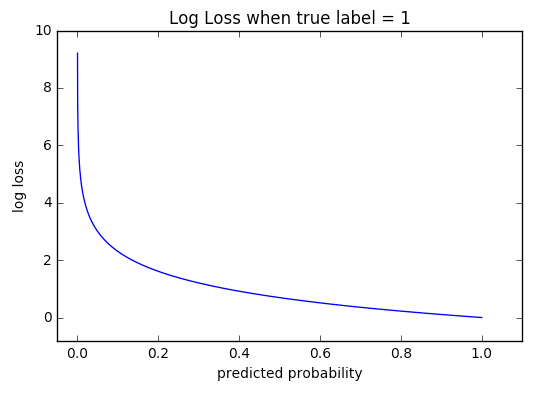


Cross-entropy lose hay còn gọi là log loss. Được dùng để đánh gía performance của classification model, cái mà có ouput nằm trong khoảng (0,1)

Nó được miêu tả bằng 1 đồ thị có dạng hàm log, trong đó xác xuất dự đoán chính xác (trục x) càng lớn càng tốt

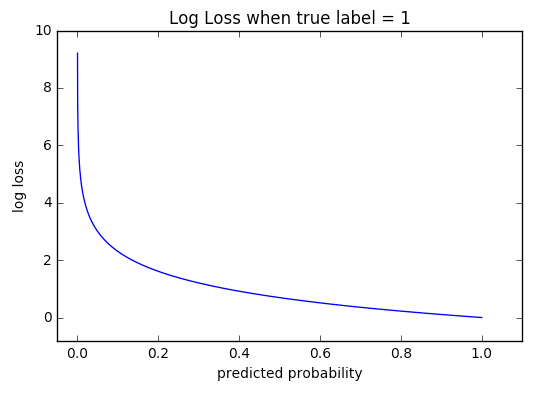


Về mặt toán học: gọi giá trị label thực tế là y (actual label) và giá trị model predict là p
- Với bài toán phân loại nhị phân, hàm lose được tính như sau:
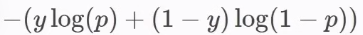

  - Khi y = 1, p = 0 (dự đoán sai). Lúc này cros-entropy sẽ là - log(0) có giá trị dương vô cùng => Model bị phạt (sanctioned)

  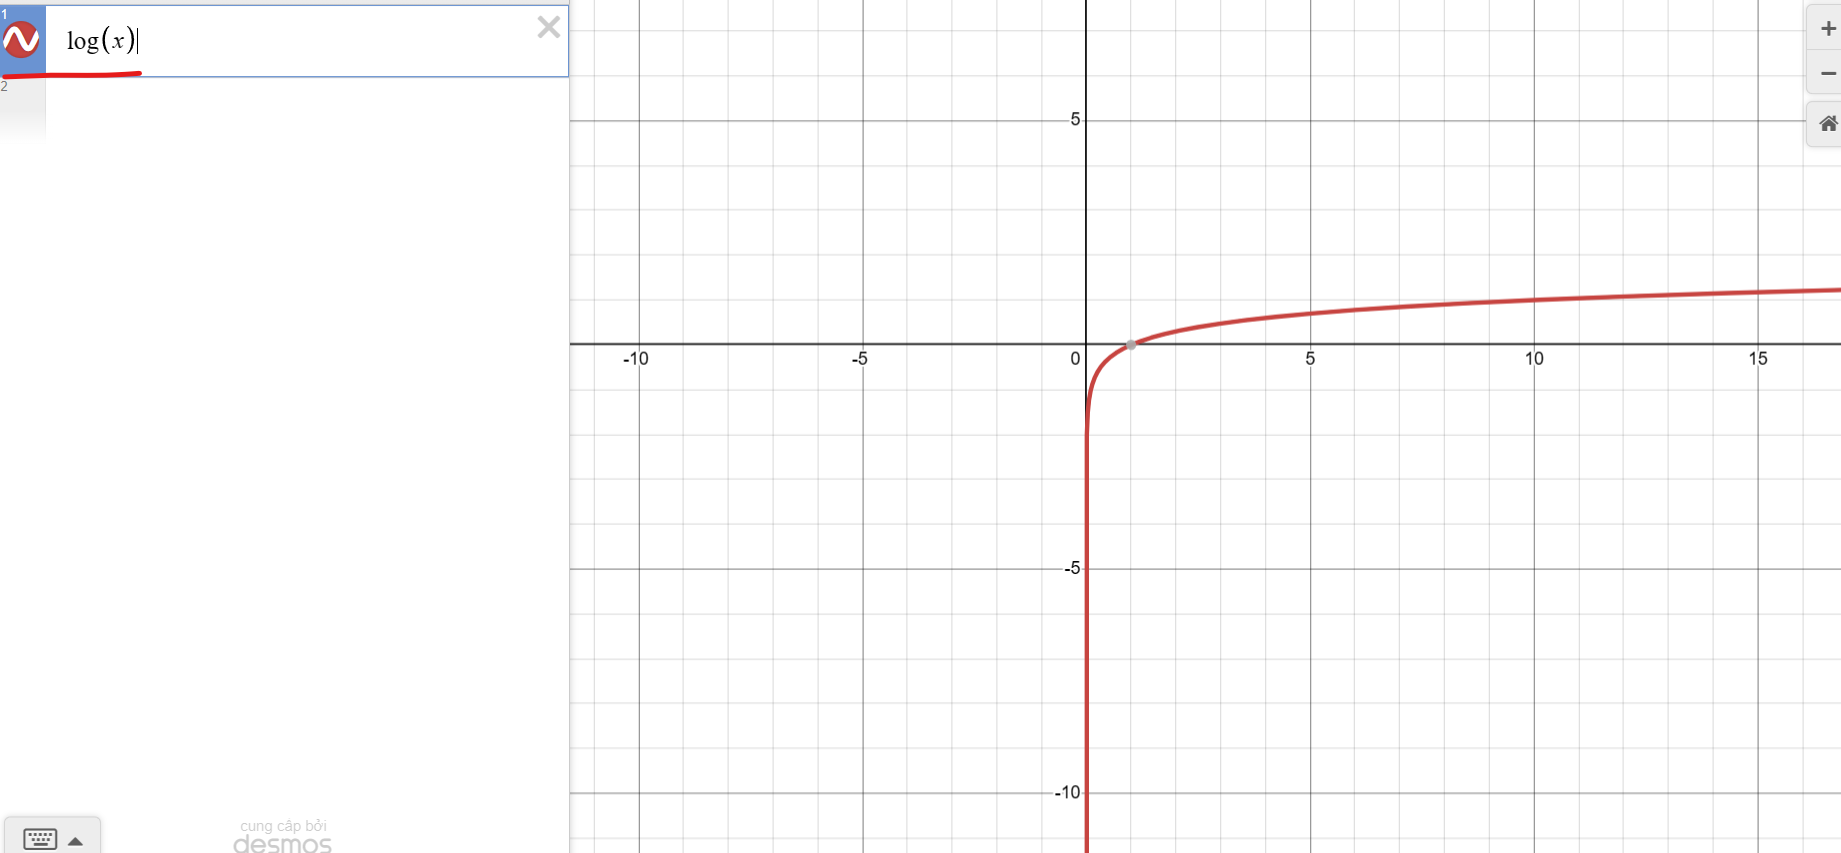

  - Khi y = 0, p = 1 (dự đoán sai) thì cross entropy là - log(0) hay dương vô cùng => Phạt
  - Khi y = p = 1 (dự đoán đúng) thì cross entropy là 0 và bất kỳ lúc nào dự đoán đúng entropy sẽ là 0, nếu dự đoán càng gần giá trị thực tế thì nó càng gần 0
- Với bài toán multi classification: Mỗi quan sát x có label y và được dự đoán p, entropy được tính bằng tổng các entropy của mỗi label mà x có thể được dự đoán
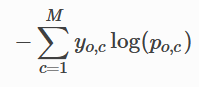

## Học cách sử dụng module tf.keras.losses.BinaryCrossentropy: https://www.tensorflow.org/api_docs/python/tf/keras/losses/binary_crossentropy

In [ ]:
y_true = tf.constant([0,1,0,0])
y_pred = tf.constant([0.6,0.51,0.94,1])
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0863576>

thuộc tính from_logitss của hàm BinaryCrossentropy() trong doc có giá trị mặc định là Flase, nghĩa là các phần tử trong y_true và y_pred có giá trị trong khoảng 0-1

## Quay lại bài toán

### Đánh giá model dựa trên accuracy

activation là sigmoid => Giá trị đầu ra của mỗi neutron là các tensor trong đó giá trị các phần tử thuộc khoảng 0 đến 1 => Khi sử dụng binarycrossrentropy không cần from_logits=True

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = BinaryCrossentropy(),
    # accuracy = số lượng dự đoán chính xác/tổng số lần dự đoán
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

### Nâng cao, đánh giá model dựa trên các thông số khác ngoài accuracy

Đánh giá model dựa trên 1 tham số là accuracy không phải là ý hay, còn có rất nhiều tham số khác để evaluate model là tốt hay không

Các khái niệm TN, TP, FN, FP và confusion matrix

Positive (dương tính): là tế bào bị ký sinh-Parasite (P) 

Negative (âm tính): tế bào không bị ký sinh - Uneffective (U)
    
Tóm lại dương tính là có bệnh còn âm tính thi không

Giả sự model train có accuracy = 94% => có 6% dự doán sai

    actual: P, predicted: U => False Negative: model dự đoán là Negative trong khi thực tế là Positive

    actual: U, predicted: P => False Positive: model dự đoán là Positive trong khi thực tế là Negative

    Tương tự có True Negative và True Positive

Để minh họa cho các trường hợp này, có 1 ma trận gọi là confusion matrix

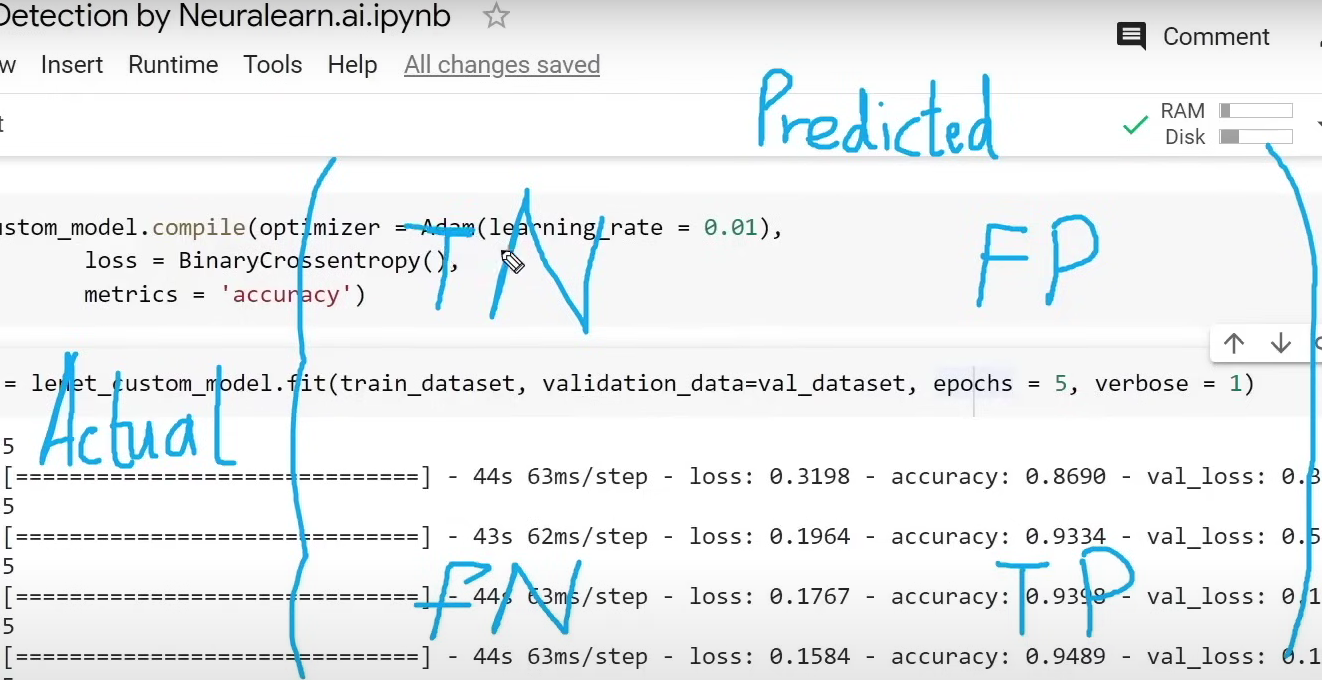

Ta sẽ đánh giá model dựa theo ma trận này, giả sử trong bài này ta có confusion matrix như sau
    
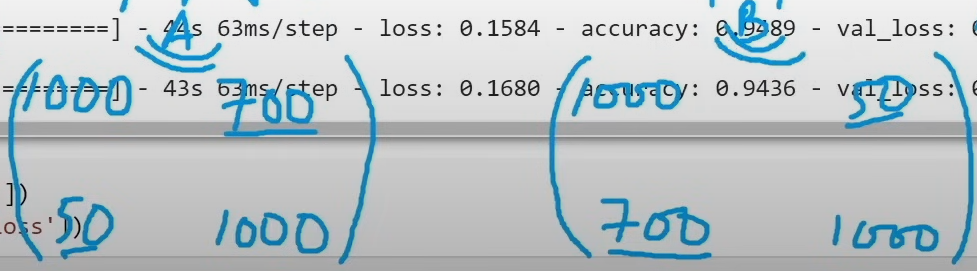
    
Dự đoán sốt rét là 1 bài toán đòi hỏi độ chính xác cao và giảm thiểu khă năng tệ nhất nếu có thể . Model dự đoán khách hàng không có bệnh trong khi thực tế khác hàng có bênh. Bệnh nhân chủ quan đi về luôn không cần khám => Th này là False Negative và phải chọn Model có FN nhỏ nhất chứ không phải chọn accuracy lớn nhất => Chọn model A

Thường ta muốn minimumize các trường hợp model dự đoán False. Còn Flase Negative hay False Positive thì tùy bài

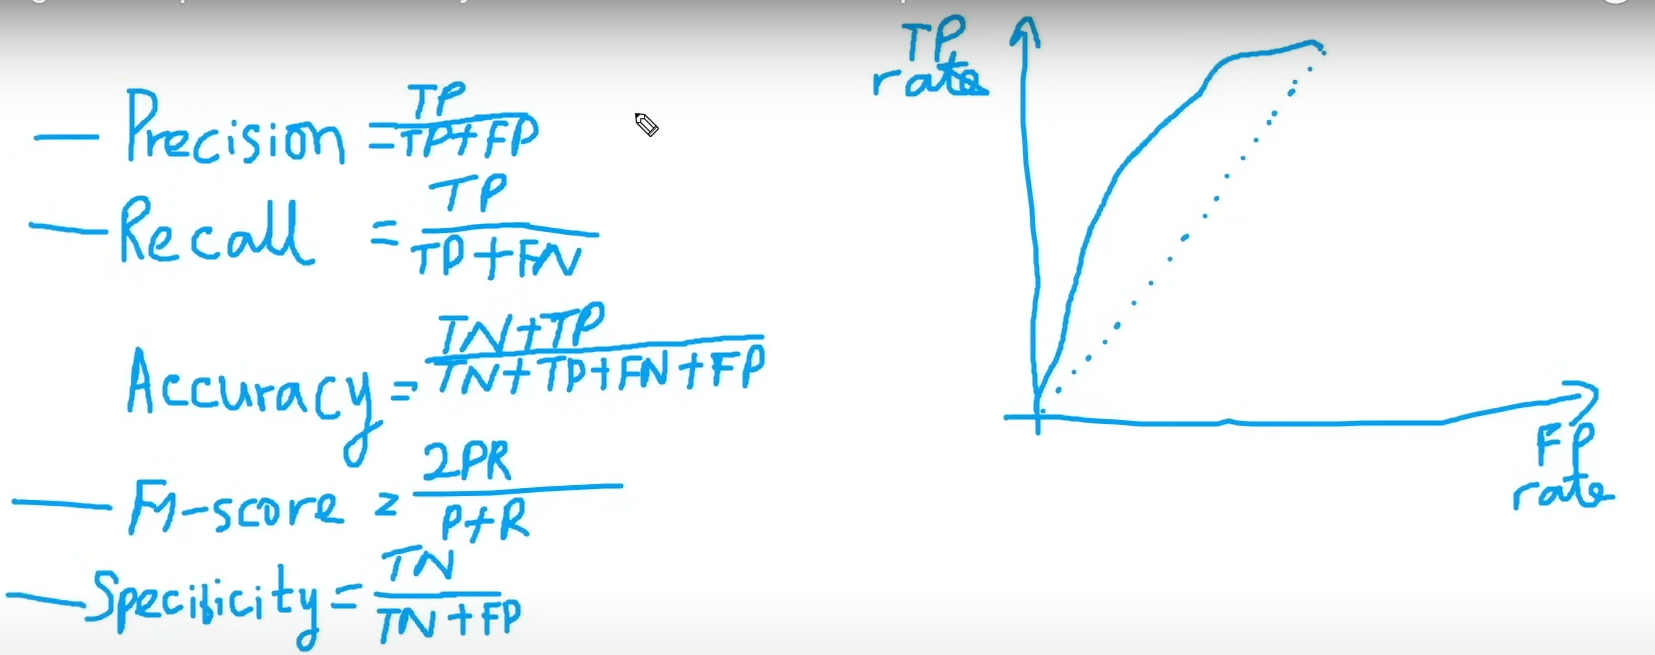

Đưa 1 tập val/test set vào model
- accuracy: số sample dự đoán đúng trên tổng số sample. Không phải lúc nào accuracy luôn là metric dự đoán tốt nhất
- precision: là tỉ lệ giữa số lượng các dự đoán đúng thuộc một lớp cụ thể trên tổng số các dự đoán thuộc lớp đó
- recall: là tỉ lệ giữa số lượng các dự đoán đúng thuộc một lớp cụ thể trên tổng số lượng thực tế của các mẫu thuộc lớp đó => Trong trường hợp trên là làm thế nào để recall của Uneffective cao nhất
- f1-score: (2 * precision * recall) / (precision + recall)
- specificity:
- ROC: là cái đường trong hình trên - receiver operating characteristic - những đặc thù có tác dụng với người nhận. Nó là 1 đường cong biểu thị mối quna hệ giữa TP rate (= TP/(TP+FN)) và FP rate (= FP/(FP+TN)). Một mô hình phân loại tốt sẽ có đường cong ROC gần góc bên trái (TP rate cao còn FP rate thấp).

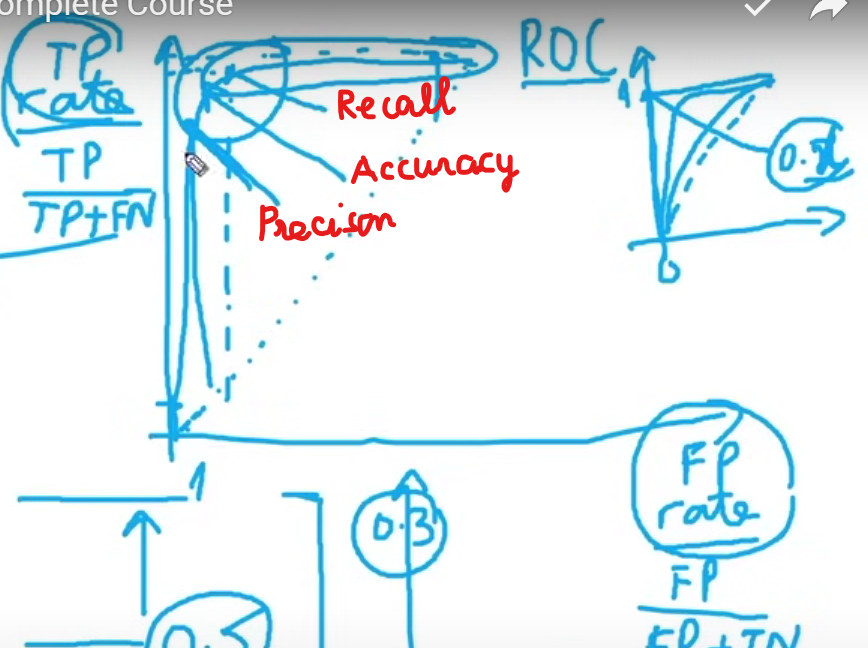

- AUC - Area Under the curve: quay lại bài toán chọn model A hay B, chúng ta có thể dựa vào biểu đồ ROC để xác định xem nên chọn model nào. Ở bài này cần chọn sao cho False Negative thấp nhất (model dự đoán là Negative => Không bị bệnh. Nhưng False nghĩa là dự đoán này bị sai, người này có bệnh). Under the curve nghĩa là đường cong bên dưới

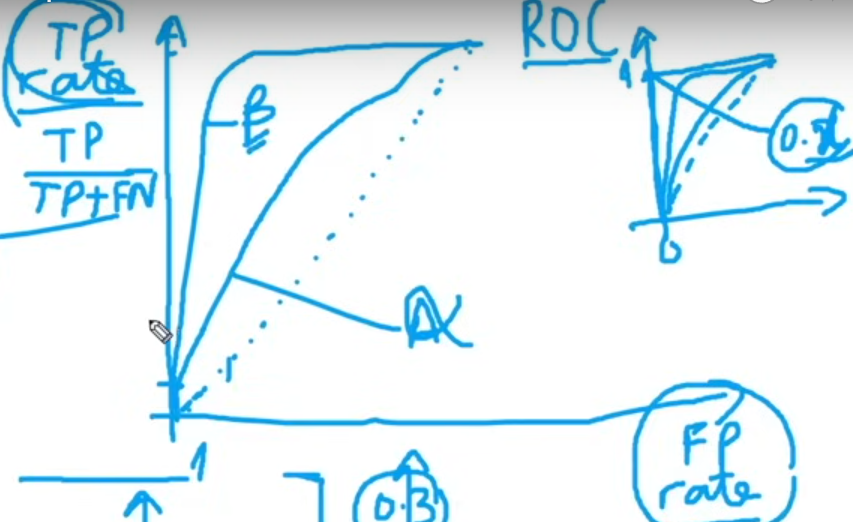

- Từ hình trên có thể thấy nên chọn model B vì nó cho ra TP rate cao hơn (TP rate = TP/ (TP+FN) => FN cao thấp thì tỷ lệ này cao)

In [27]:
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC

In [28]:
metrics = [
    TruePositives(name='TP'),
    FalsePositives(name='FP'),
    TrueNegatives(name='TN'),
    FalseNegatives(name='FN'),
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc')
]

In [29]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = BinaryCrossentropy(),
    metrics = metrics
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

# Training Convnets

Nếu không có batchnormalization thì loss và val_lose đều giữ nguyên giá trị. Nó như 1 regularizer (bộ điều chỉnh), sẽ nói sau

689 là số lượng batch trong 1 epoch

In [ ]:
history = model.fit(
    train,
    validation_data = val,
    epochs = 100,
    verbose = 1
)

Epoch 1/100


I0000 00:00:1714410952.036855   56133 service.cc:145] XLA service 0xbba0f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714410952.036932   56133 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-04-30 00:15:52.151215: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-30 00:15:52.567812: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  4/689 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - FN: 18.7500 - FP: 15.0000 - TN: 23.5000 - TP: 22.7500 - accuracy: 0.5592 - auc: 0.5501 - loss: 0.7789 - precision: 0.5800 - recall: 0.5404

I0000 00:00:1714410956.960430   56133 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - FN: 856.6536 - FP: 989.9333 - TN: 4528.8394 - TP: 4680.5220 - accuracy: 0.7940 - auc: 0.8609 - loss: 0.4433 - precision: 0.7896 - recall: 0.8065 - val_FN: 487.0000 - val_FP: 55.0000 - val_TN: 1314.0000 - val_TP: 899.0000 - val_accuracy: 0.8033 - val_auc: 0.9553 - val_loss: 0.4146 - val_precision: 0.9423 - val_recall: 0.6486
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - FN: 368.0043 - FP: 492.2275 - TN: 5026.6187 - TP: 5169.0972 - accuracy: 0.9229 - auc: 0.9672 - loss: 0.2164 - precision: 0.9157 - recall: 0.9328 - val_FN: 927.0000 - val_FP: 67.0000 - val_TN: 1299.0000 - val_TP: 462.0000 - val_accuracy: 0.6392 - val_auc: 0.9342 - val_loss: 0.5226 - val_precision: 0.8733 - val_recall: 0.3326
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - FN: 327.1406 - FP: 571.5015 - TN: 4947.3550 - TP: 5209.9507 - accuracy: 0.9274 - auc: 0.9682 - loss: 0.2086 - precision: 0.9119 - recall: 0.9473 - val_FN: 63.0000 - val_FP: 149.0000 - val_T

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

NameError: name 'history' is not defined

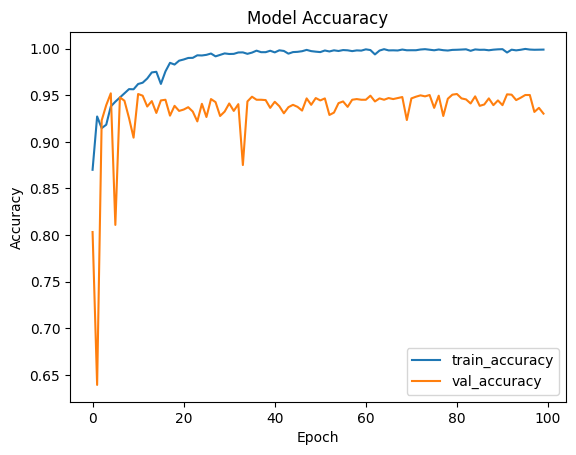

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuaracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Model evaluation and testing

## Đánh giá model với test set

In [31]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [32]:
test

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [33]:
test = test.batch(1)

In [34]:
model.evaluate(test)

I0000 00:00:1714415271.475829  108701 service.cc:145] XLA service 0x7fbb5800afa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714415271.475907  108701 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-04-30 01:27:51.550238: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-30 01:27:51.731868: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  40/2757 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - FN: 0.2000 - FP: 0.9750 - TN: 7.5250 - TP: 11.8000 - accuracy: 0.9529 - auc: 0.9203 - loss: 0.3104 - precision: 0.9104 - recall: 0.9653                          

I0000 00:00:1714415272.942111  108701 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2757/2757 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - FN: 13.5935 - FP: 100.7991 - TN: 587.2096 - TP: 677.8974 - accuracy: 0.9142 - auc: 0.9449 - loss: 0.7971 - precision: 0.8702 - recall: 0.9758


[0.7507328391075134,
 1337.0,
 193.0,
 1201.0,
 26.0,
 0.9205658435821533,
 0.8738561868667603,
 0.9809244275093079,
 0.9500445127487183]

Đánh giá model dựa trên các thông số ngoài accuracy

In [35]:
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
inputs = []
labels = []
for x, y in test.as_numpy_iterator():
    inputs.append(x)
    labels.append(y)
labels = np.array([i[0] for i in labels])
print(labels)

[0 1 1 ... 1 0 0]


2024-04-30 01:28:15.193106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
print(np.array(inputs).shape)

(2757, 1, 224, 224, 3)


10:04:45

In [37]:
predicted = model.predict()

TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'

## Dự đoán 1 image bất kỳ

Kết quả dự đoán khá gần 1 nên ta đoán được đây là tế bào bị ký sinh

In [ ]:
model.predict(test.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


0.9999999

In [ ]:
def parasite_or_not(x):
  if (x < 0.5):
    return str('P')
  else:
    return str('U')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-04-30 01:13:22.944046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


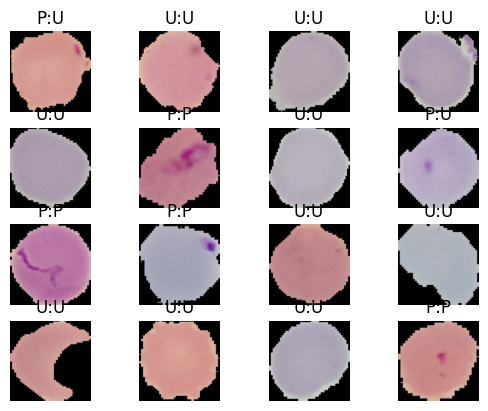

In [ ]:
for index, (image, label) in enumerate(test.take(16)):
  ax = plt.subplot(4, 4, index+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')

# Loading và Saving model vào google drive

## Phân biệt model's configuration and model's weight

Trong tensorflow và các thư viện deeplearning khác, bạn sẽ thấy 2 khái niệm này
- Model's configurations: là kiến trúc mạng CNN mà ta đã build bằng tf.keras.Sequential()
- Model's weight: các parameter của mạng CNN được xác định sau khi train thành công

Để lưu model cần phải lưu 2 cái kia, có 2 option
- Lưu cả 2:
- Chỉ lưu trọng số weight: Cái này là cái quan trọng. Ví dụ chatgpt đã public model của nó lên git => Nhưng không thể train được vì không có dataset và nếu có dataset thì phải train rất nhiều ngày

Tensorflow cho phép lưu trạng thái model đang train dở và tiếp tục train hoặc sử dụng nó trong tương lai

## Lưu model bài này vào drive

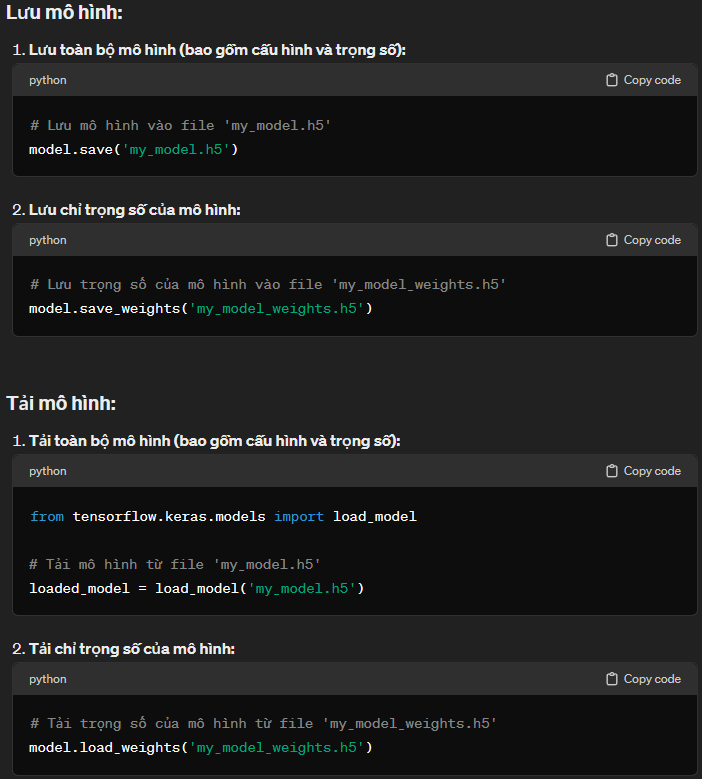

In [ ]:
model.save('model_metrics.keras')

model.save('my_model.h5)